## 선형 회귀 (Linear Regression)

- 입력(x)과 출력(y) 간의 선형 관계(직선)를 모델링하는 알고리즘
  - 목표 : 데이터의 오차를 최소화하는 '최적의 직선'을 찾는 것
  - 단순 선형 회귀 : 특징(독립 변수)이 1개일 때 (y = ax + b)
  - 다중 선형 회귀 : 특징(독립 변수)이 2개 이상일 때 (y = a1x1 + a2x2 + ... + b)
- 직관적이고 해석이 쉬운 편이며, 예측 값이 연속적인 숫자일 때 사용 (ex. 집값, 온도, 점수, ...)

### 용어 정리
- X (입력 데이터) = 특징 (Feature) = 독립변수 : 모델이 결과를 예측하기 위해 사용하는 데이터. 모델에 들어가는 재료.
- y (출력 데이터) = 목표 (Target) = 종속변수 : 모델이 예측해야 하는 '정답' 정보. X에 종속되어 결정됨.

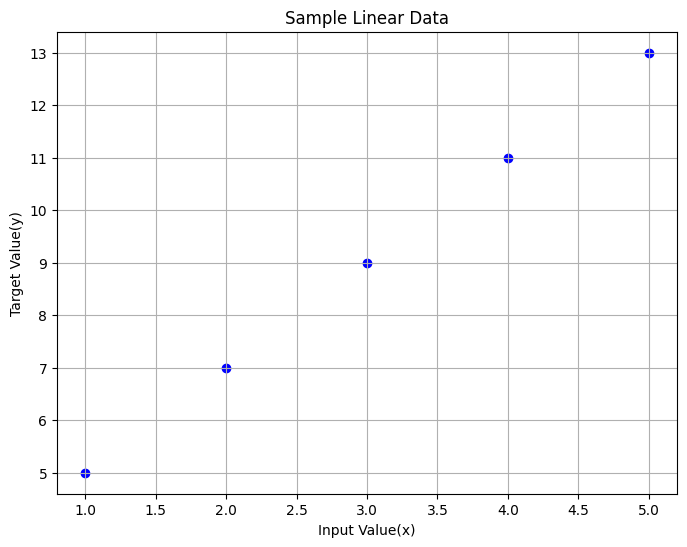

In [ ]:
import numpy as np

# 샘플 데이터
x = np.array([[1], [2], [3], [4], [5]]) # Feature(특징)가 1개인 데이터셋
y = np.array([5, 7, 9, 11, 13])         # Target(목표값)
# => 입력(x)값이 1씩 증가될 때마다 목표(y)값이 2씩 증가됨 => 완벽한 선형 관계
#    데이터를 기준으로 기울기가 2, 절편이 3이 됨을 알 수 있음.

# x, y 데이터로 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
# 산점도 그래프로 표시
plt.scatter(x, y, color='blue')

plt.title('Sample Linear Data')
plt.xlabel('Input Value(x)')
plt.ylabel('Target Value(y)')
plt.grid(True)
plt.show()

 기울기(계수) : 2.0
 절편 : 3.0


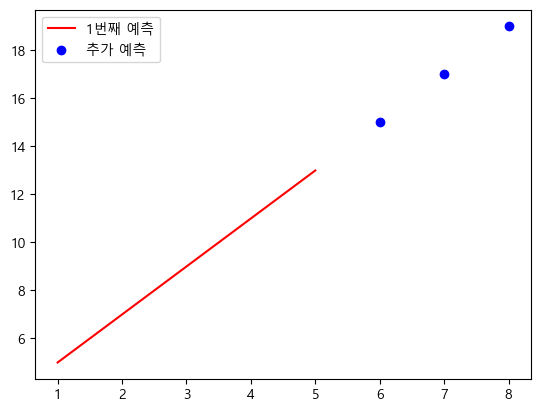

In [11]:
# 선형 회귀 모델
from sklearn.linear_model import LinearRegression

model = LinearRegression()    # 모델 생성

model.fit(x, y)               # 학습

# 기울기, 절편 확인
# 기울기(회귀계수)
# model.coef_[0]
print(f' 기울기(계수) : {model.coef_[0]}')
# 절편
# model.intercept_
print(f' 절편 : {model.intercept_}')
# => y = 2x + 3

# -----

plt.rc('font', family='Malgun Gothic')

# 예측
y_pred = model.predict(x)

plt.plot(x, y_pred, color='red', label='1번째 예측')

x_test = np.array([[6], [7], [8]])
y_test_pred = model.predict(x_test)

plt.scatter(x_test, y_test_pred, color='blue', label='추가 예측')

plt.legend()

---

In [ ]:
# 당뇨병 데이터셋으로 선형 회귀 연습
from sklearn.datasets import load_diabetes

# 데이터 로드
# * 데이터프레임 형태로 읽어보기
# diabetes = load_diabetes(as_frame=True)
# df = diabetes.frame            # 전체 DataFrame (Feature + Target)
# # print(df)
# x = df.drop(columns='target')  # 입력 데이터(Feature)
# y = df['target']               # 목표 데이터(Target)

# * Bunch 형태로 읽어오기 (dict와 비슷한 객체)
diabetes = load_diabetes()

x = diabetes.data       # Feature(입력)
y = diabetes.target     # Target(목표)

print(type(x), x)
print(type(y), y)
# => x, y는 ndarray 타입!

<class 'numpy.ndarray'> [[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
<class 'numpy.ndarray'> [151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98

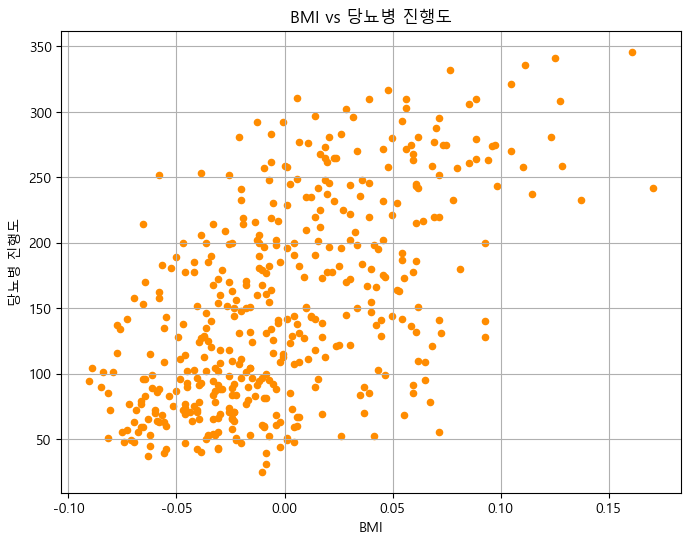

In [20]:
# 데이터셋을 시각화

# 특징(x)이 많을 경우에는 하나만 선택해서 시각화
# -> BMI(3번째 Feature, Index 2) 선택

bmi_data = x[:, 2]    # Feature 데이터 중 모든 행의 인덱스 2번 열만 선택
# bmi_data

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지 설정

plt.figure(figsize=(8,6))
plt.scatter(bmi_data, y, color='darkorange', s=20)  # s: 마커의 크기
plt.title('BMI vs 당뇨병 진행도')
plt.xlabel('BMI')
plt.ylabel('당뇨병 진행도')
plt.grid(True)

In [22]:
# 훈련용, 테스트용 데이터 분리 (8:2)
from sklearn.model_selection import train_test_split

# x_train
# x_test
# y_train
# y_test

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
# 모델 생성 학습
from sklearn.linear_model import LinearRegression

# 모델 생성
model = LinearRegression()      # 선형 회귀 모델
# 설정 옵션
# - fit_intercept (기본값: True)
#   - True : 절편 계산 (일반적인 회귀 분석 시 설정)
#   - False : 절편을 0으로 설정. 원점(0,0)을 통과하도록 설정(계산)

# - copy_X (기본값: True)
#   - True : 복사본 사용. 원본(x)는 변경되지 않음
#   - False : 원본 사용. 

# - n_jobs (기본값: None)
#   - 계산에 사용할 CPU 코어 수
#   - -1 설정 시, 사용 가능한 모든 코어 사용 (=> 속도 향상)

# 학습 (훈련용 데이터)
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# 예측 (테스트용 데이터)
y_pred = model.predict(x_test)

print(f'예측 결과 : {y_pred}')
print(f'실제 결과 : {y_test}')
# => 결과를 보아 예측을 잘 못했다는 것이 보임...
#    복잡한 데이터인 경우 선형회귀모델로는 성능이 좋지 않을 수 있음..!

예측 결과 : [139.5475584  179.51720835 134.03875572 291.41702925 123.78965872
  92.1723465  258.23238899 181.33732057  90.22411311 108.63375858
  94.13865744 168.43486358  53.5047888  206.63081659 100.12925869
 130.66657085 219.53071499 250.7803234  196.3688346  218.57511815
 207.35050182  88.48340941  70.43285917 188.95914235 154.8868162
 159.36170122 188.31263363 180.39094033  47.99046561 108.97453871
 174.77897633  86.36406656 132.95761215 184.53819483 173.83220911
 190.35858492 124.4156176  119.65110656 147.95168682  59.05405241
  71.62331856 107.68284704 165.45365458 155.00975931 171.04799096
  61.45761356  71.66672581 114.96732206  51.57975523 167.57599528
 152.52291955  62.95568515 103.49741722 109.20751489 175.64118426
 154.60296242  94.41704366 210.74209145 120.2566205   77.61585399
 187.93203995 206.49337474 140.63167076 105.59678023 130.70432536
 202.18534537 171.13039501 164.91423047 124.72472569 144.81030894
 181.99635452 199.41369642 234.21436188 145.95665512  79.86703276
 15

In [ ]:
# 성능 평가
from sklearn.metrics import r2_score, mean_squared_error

print(f'R2 : {r2_score(y_test, y_pred)}')
print(f'MSE : {mean_squared_error(y_test, y_pred)}')
# => R2 : 0.45. 45% 예측 가능. 설명이 가능하다는 것을 의미.

R2 : 0.4526027629719197
MSE : 2900.19362849348


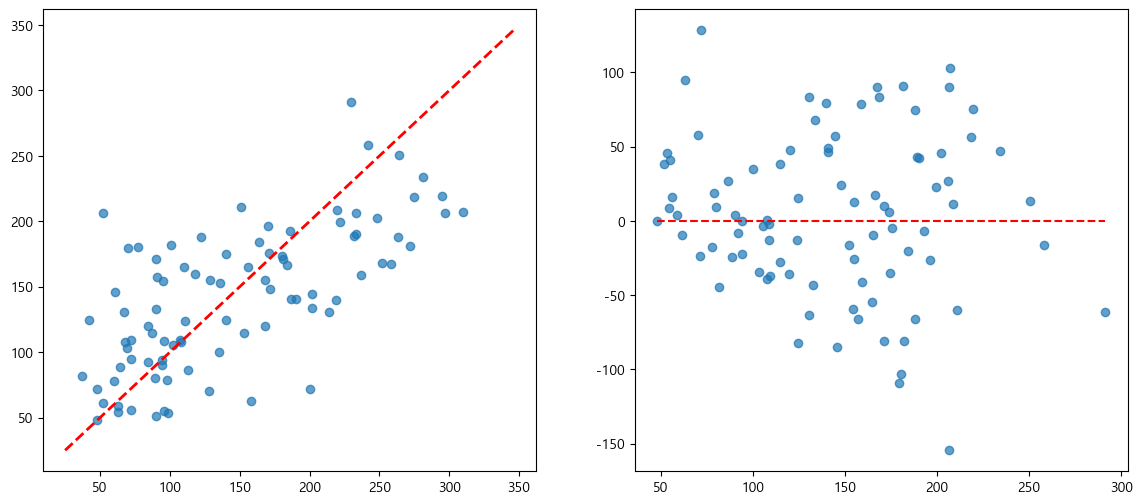

In [ ]:
# 예측 결과 시각화

plt.figure(figsize=(14,6))

## * 실제값과 예측값을 산점도로 시각화
#    - 실제값(x축), 예측값(y축)
plt.subplot(1, 2, 1)              # 1행 2열 중 첫번째 위치에 그래프 표시 (지정)
plt.scatter(y_test, y_pred, alpha=0.7)
# alpha : 투명도

plt.plot([y.min(), y.max()]       # x축의 최솟값, 최댓값
         , [y.min(), y.max()]     # y축의 최솟값, 최댓값
         , 'r--'                  # 빨간색 점선으로 표시
         , lw=2)                  # 선 굵기
# => 대각선에 점들이 가깝게 분포해있다면, 좋은 성능을 가졌다고 판단해도 됨

## * 잔차를 이용해서 시각화
# 잔차 = 실제값 - 예측값
residuals = y_test - y_pred

plt.subplot(1, 2, 2)              # 1행 2열 중 두번째 위치에 그래프 표시(지정)
plt.scatter(y_pred, residuals, alpha=0.7)

# 잔차가 0인 기준선 표시. y=0 위치에 수평선 표시.
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red', linestyles='--')
# => 잔차 기준선(y=0)에 가깝고, 포인트들이 무작위로 분포해 있을 경우 좋은 성능을 가진 편이라고 볼 수 있음

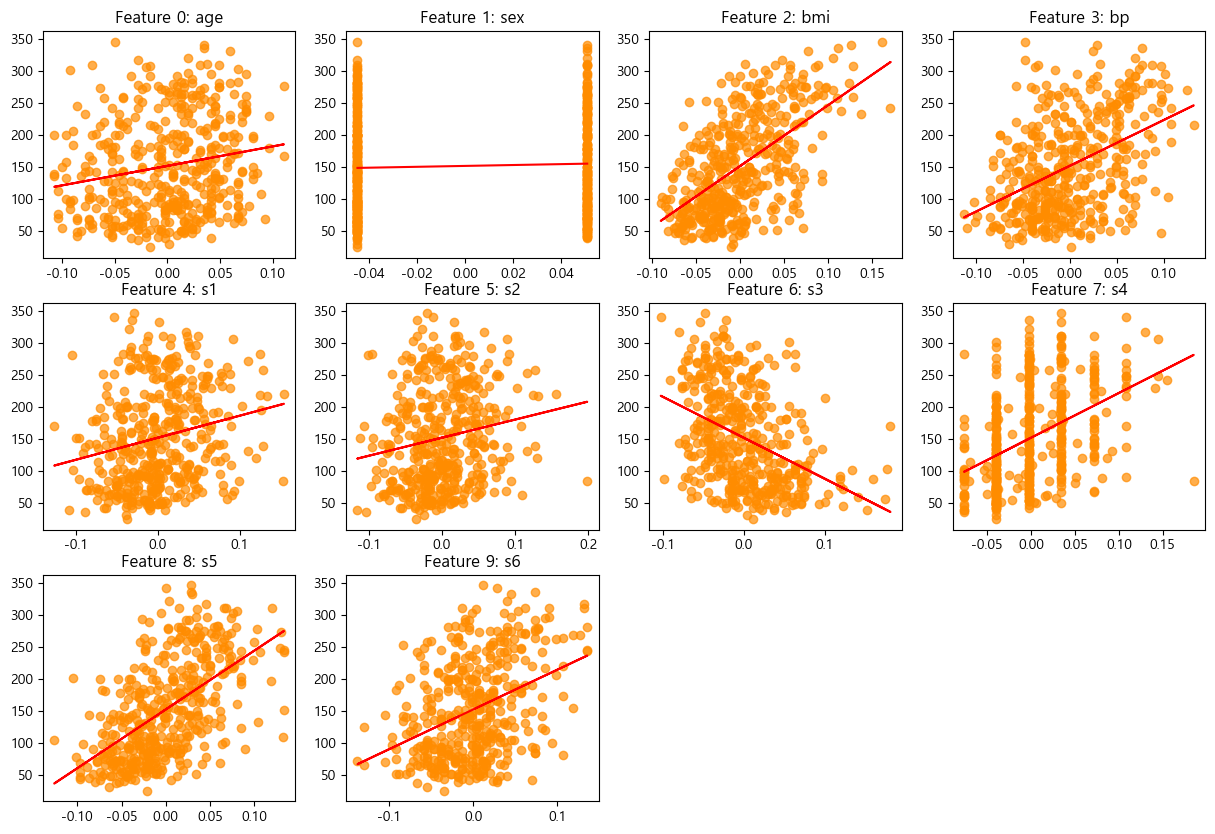

In [ ]:
# Feature(특징)별로 시각화
f_size = x.shape[1]     # 특징 개수

plt.figure(figsize=(15,10))

for i in range(f_size):   # i: 0 ~ 9
  plt.subplot(3, 4, i+1)  # 3행 4열로 그래프 표시

  plt.scatter(x[:, i], y, color='darkorange', alpha=0.7)  # 각 Feature 표시

  # 모델 생성 및 학습, 예측 (=> 각 Feature별로 진행)
  feature = x[:, i].reshape(-1, 1)  # 1d -> 2d
  model = LinearRegression().fit(feature, y)
  y_pred = model.predict(feature)

  # 그래프 표시
  plt.plot(feature, y_pred, color='red')
  plt.title(f'Feature {i}: {diabetes.feature_names[i]}')

  # 각 포인트가 직선 주변에 얼마나 밀접해있는 지 확인
  # 기울기. 특성 값이 증가할 때 목표 값이 증가되는 지? 감소되는 지?

  # BMI(Feature 2), S5(Feature 8) 특징들이 밀접한 관계가 있음.
  # Sex(Feature 1), S3(Feature 6), S4(Feature 7) 등을 보면 포인트가 넓게 분포되어 있고, 직선의 기울기도 수평에 가깝거나, 음수의 기울기를 가지고 있음. 예측이 어렵다..!